<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Make-plots" data-toc-modified-id="Make-plots-1">Make plots</a></span><ul class="toc-item"><li><span><a href="#Install-packages-and-define-functions" data-toc-modified-id="Install-packages-and-define-functions-1.1">Install packages and define functions</a></span></li><li><span><a href="#Plot-IFN-data" data-toc-modified-id="Plot-IFN-data-1.2">Plot IFN data</a></span></li><li><span><a href="#Plot-activity-on-full-length-template" data-toc-modified-id="Plot-activity-on-full-length-template-1.3">Plot activity on full-length template</a></span></li><li><span><a href="#Plot-activity-on-short-template" data-toc-modified-id="Plot-activity-on-short-template-1.4">Plot activity on short template</a></span></li></ul></li></ul></div>

# Make plots
Make plots for figure; data from AJ te Velthuis is simply being re-plotted here.

## Install packages and define functions

In [1]:
# install R packages
r_packages <- c(
  "ggplot2", "cowplot", "dplyr", "magrittr", "viridis",
  "IRdisplay", "tidyverse", "stringr", "scales")
suppressMessages(invisible(
  lapply(r_packages, library, character.only=TRUE)))

# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
# The palette with grey:
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", 
               "#0072B2", "#D55E00", "#CC79A7")

saveShowPlot <- function(p, width, height, plotname=NA) {
  if (is.na(plotname))
    plotname <- gsub("\\.", "_", deparse(substitute(p))) 
  pngfile <- sprintf("%s.png", plotname)
  pdffile <- sprintf("%s.pdf", plotname)
  ggsave(pngfile, plot=p, width=width, height=height, units="in")
  ggsave(pdffile, plot=p, width=width, height=height, units="in")
  display_png(file=pngfile, width=90 * width)
}

## Plot IFN data

Read data:

In [25]:
ifn_data <- read.csv("IFNdata.csv")

samples <- ifn_data %>% distinct(sample) %$% sample
  
ifn_data <- ifn_data %>%
  transform(sample=factor(sample, samples, ordered=TRUE)) %>%
  mutate(mut_type=ifelse(sample == "Wildtype", "wildtype",
                  ifelse(sample == "PB1a", "negative control",
                  "mutant"))
         )

ifn_data

sample,measurement,value,mut_type
PB1a,IFN,0.000000,negative control
Wildtype,IFN,1.000000,wildtype
D27N,IFN,2.076966,mutant
T667A,IFN,8.236751,mutant
PB1a,IFN,0.000000,negative control
Wildtype,IFN,1.063748,wildtype
D27N,IFN,1.474822,mutant
T667A,IFN,7.313362,mutant
PB1a,IFN,0.000000,negative control
Wildtype,IFN,0.807459,wildtype


Plot data:

Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing missing values (geom_point).”

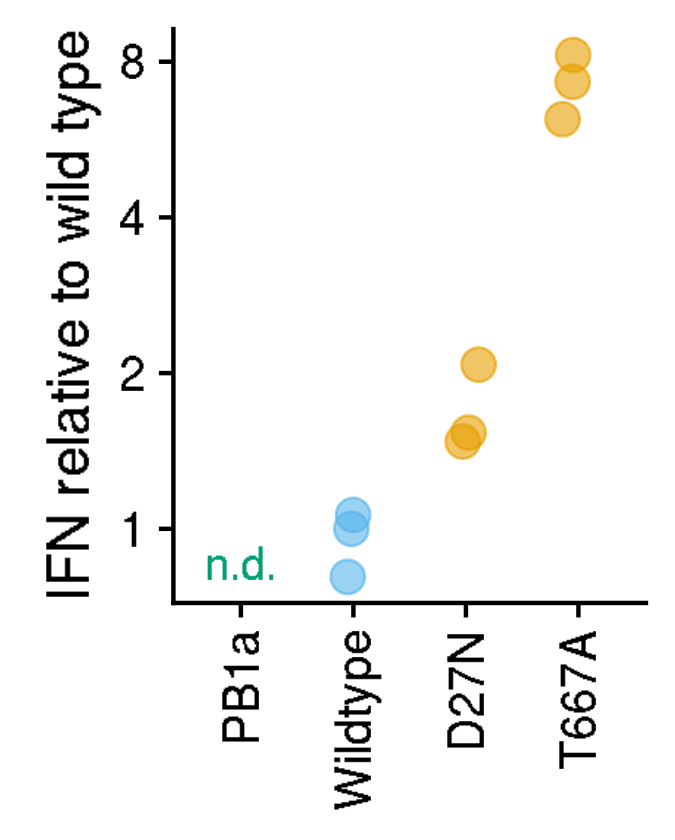

In [3]:
# prep data for plotting
ifn_data <- ifn_data %>% 
  filter(measurement == "IFN") %>%
  mutate(value=ifelse(value == 0, NA, value)) %>%
  group_by(sample) %>%
  mutate(all_na=all(is.na(value))) %>%
  ungroup %>%
  mutate(textlabel=ifelse(all_na, 'n.d.', ''))

# plot
ifn_plot <- ifn_data %>%
  ggplot(aes(sample, value, color=mut_type)) +
  geom_jitter(height=0, width=0.15, size=3.5, alpha=0.6) +
  geom_text(data=ifn_data %>% 
                   group_by(sample) %>% 
                   summarize(textlabel=first(textlabel),
                             mut_type=first(mut_type)),
            aes(sample, y=1, label=textlabel),
            hjust=0.5, vjust=1.5
            ) +
  theme(axis.text.x=element_text(angle=90, vjust=0.5, hjust=1, size=12),
        legend.position='none',
        axis.title.x=element_blank()
        ) +
  scale_color_manual(values=c(cbPalette[2], cbPalette[4], cbPalette[3])) +
  scale_y_continuous(trans=log2_trans()) +
  ylab("IFN relative to wild type")

saveShowPlot(ifn_plot, height=2.8, width=2.25)

## Plot activity on full-length template
Read data, indicating which are significant from separate calculations by AJ:

In [4]:
full_length_data <- read.csv("full_length_template_data.csv")

variants <- full_length_data %>% distinct(variant) %$% variant

full_length_data <- full_length_data %>%
  transform(variant=factor(variant, variants, ordered=TRUE)) %>%
  mutate(sig=ifelse(variant == "Wildtype", "wildtype",
             ifelse(variant == "PB1a", "negative control",
             "significant"))
         )

full_length_data

variant,activity,measurement,sig
PB1a,0.000000,vRNA,negative control
Wildtype,100.000000,vRNA,wildtype
D27N,25.294673,vRNA,significant
T667A,145.928138,vRNA,significant
PB1a,0.000000,vRNA,negative control
Wildtype,100.000000,vRNA,wildtype
D27N,23.825166,vRNA,significant
T667A,247.952115,vRNA,significant
PB1a,0.000000,vRNA,negative control
Wildtype,100.000000,vRNA,wildtype


Now make the plot:

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

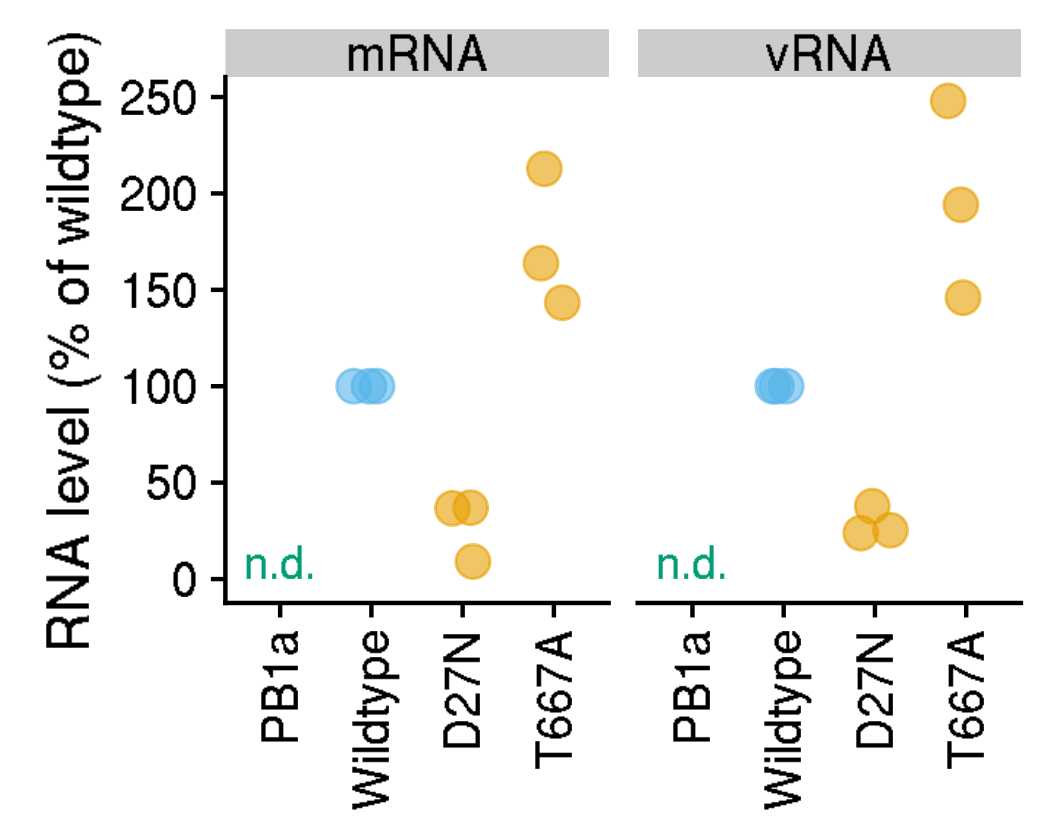

In [67]:
# prep data for plotting
full_length_data <- full_length_data %>% 
  mutate(activity=ifelse(activity == 0, NA, activity)) %>%
  group_by(variant) %>%
  mutate(all_na=all(is.na(activity))) %>%
  ungroup %>%
  mutate(textlabel=ifelse(all_na, 'n.d.', ''))

# plot
full_length_plot <- full_length_data %>%
  ggplot(aes(variant, activity, color=sig)) +
  geom_jitter(height=0, width=0.2, size=3.5, alpha=0.6) +
  geom_text(data=full_length_data %>% 
                   group_by(variant) %>% 
                   summarize(textlabel=first(textlabel),
                             sig=first(sig)),
            aes(variant, y=0, label=textlabel),
            hjust=0.5, vjust=0
            ) +
  theme(axis.text.x=element_text(angle=90, vjust=0.5, hjust=1, size=12),
        legend.position='none',
        axis.title.x=element_blank()
        ) +
  scale_color_manual(values=c(cbPalette[4], cbPalette[2], cbPalette[3])) +
  ylab("RNA level (% of wildtype)") +
  facet_wrap(~ measurement)

saveShowPlot(full_length_plot, height=2.8, width=3.5)

## Plot activity on short template
Read data; none are significant from separate calculations by AJ:

In [28]:
short_data <- read.csv("short_template_data.csv")

variants <- short_data %>% distinct(variant) %$% variant

short_data <- short_data %>%
  transform(variant=factor(variant, variants, ordered=TRUE)) %>%
  filter(! is.na(activity))

short_data

variant,activity,measurement
Wildtype,100.00000,vRNA
D27N,91.44936,vRNA
T667A,116.72518,vRNA
Wildtype,100.00000,vRNA
D27N,112.15584,vRNA
T667A,189.25874,vRNA
Wildtype,100.00000,vRNA
D27N,81.32138,vRNA
T667A,151.38156,vRNA


Now make the plot:

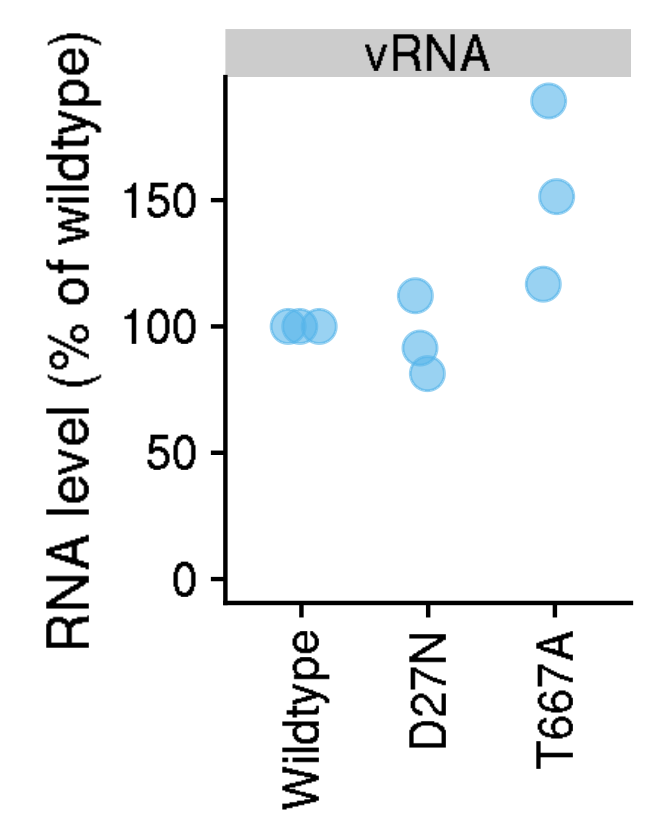

In [59]:
short_plot <- short_data %>%
  ggplot(aes(variant, activity)) +
  geom_jitter(height=0, width=0.15, size=3.5, alpha=0.6, color=cbPalette[[3]]) +
  theme(axis.text.x=element_text(angle=90, vjust=0.5, hjust=1, size=12),
        legend.position='none',
        axis.title.x=element_blank()
        ) +
  ylab("RNA level (% of wildtype)") +
  scale_y_continuous(limits=c(0, NA)) +
  facet_wrap(~ measurement)

saveShowPlot(short_plot, height=2.8, width=2.2)